# Explore raw dataset

In [ ]:
from pathlib import Path

import SimpleITK as sitk
import neurite as ne
import numpy as np

from notebooks.utils import ImageLoader

Load images and segmentations, then convert them to Numpy

In [1]:
base_folder = Path(r"R:\DATASET_PROSTATE")
patient, mr_data, us_data = "paziente666", "Dato1", "Dato1"

# prepare filenames
mr_data_folder = base_folder / "mri" / patient / mr_data
us_data_folder = base_folder / "us" / patient / us_data
mr_image_filename = list(mr_data_folder.rglob("MRI*"))[0]
us_image_filename = list(us_data_folder.rglob("US*"))[0]
mr_prostate_filename = list(mr_data_folder.rglob("Prostate*"))[0]
us_prostate_filename = list(us_data_folder.rglob("Prostate*"))[0]
del mr_data_folder, us_data_folder

# load and crop
isotropic_spacing = [0.5, 0.5, 0.5]
cropping_size = [144, 144, 144]  # the paper uses [160, 192, 224]...
mr_image_cropped, mr_prostate_cropped, mr_image_nrrd, mr_prostate_nrrd = ImageLoader.load_image(mr_image_filename, mr_prostate_filename, isotropic_spacing, cropping_size)
us_image_cropped, us_prostate_cropped, us_image_nrrd, us_prostate_nrrd = ImageLoader.load_image(us_image_filename, us_prostate_filename, isotropic_spacing, cropping_size)
del mr_image_filename, us_image_filename, mr_prostate_filename, us_prostate_filename

NameError: name 'Path' is not defined

### Data Inspection
Show the volumes (middle slices)

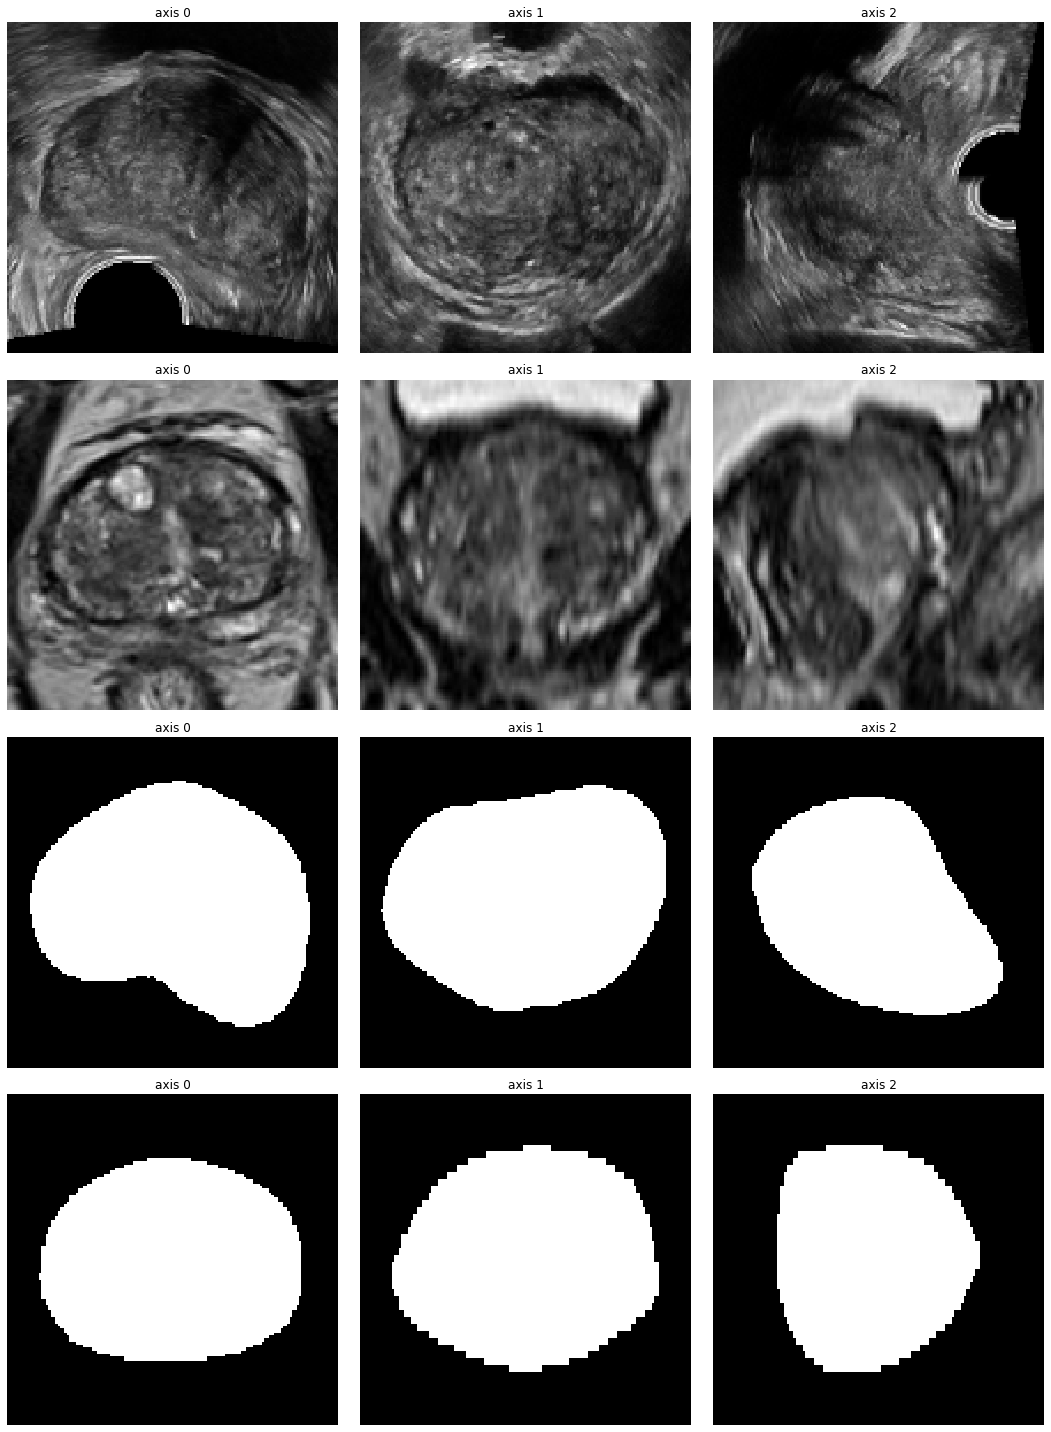

In [3]:
ne.plot.volume3D([us_image_cropped, us_prostate_cropped, mr_image_cropped, mr_prostate_cropped], cmaps=["gray"])

Open the images in 3D Slicer if needed

In [ ]:
viewer = sitk.ImageViewer()
viewer.SetCommand("Slicer")
viewer.Execute(mr_image_nrrd)

Show 16 sagittal slices

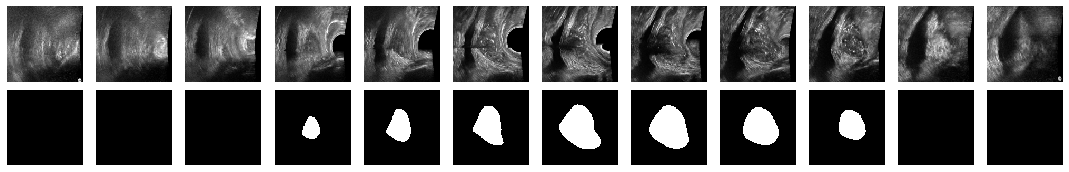

In [32]:
_ = ne.plot.slices([us_image_cropped[:,:,i] for i in range(0, us_image_cropped.shape[2], 12)]
                 + [us_prostate_cropped[:,:,i] for i in range(0, us_prostate_cropped.shape[2], 12)], cmaps=["gray"], grid=(2, 12))

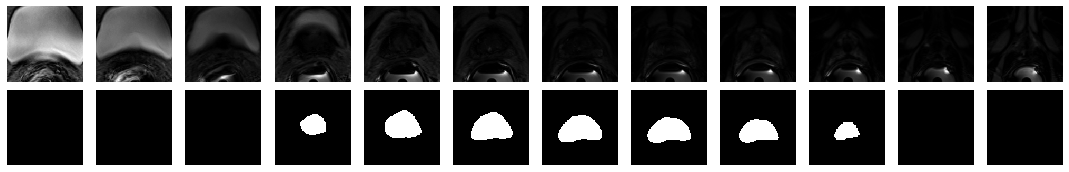

In [31]:
_ = ne.plot.slices([mr_image_cropped[i,:,:] for i in range(0, mr_image_cropped.shape[0], 12)]
                 + [mr_prostate_cropped[i,:,:] for i in range(0, mr_prostate_cropped.shape[0], 12)], cmaps=["gray"], grid=(2, 12))

# Explore preprocessed dataset

float16


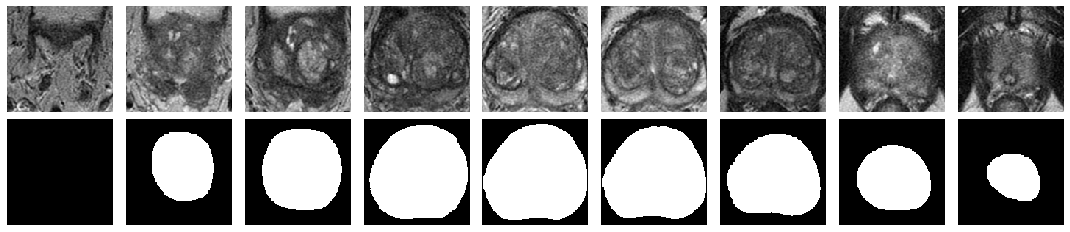

In [2]:
output_folder = Path(r"R:\DATASET_PROSTATE\numpy_144")
pace = 16

full_data = np.random.choice(list(output_folder.iterdir()), 1)[0]
full_data = full_data.parent / "paziente1003_Dato1_Dato1.npz"
data = np.load(str(full_data))

_ = ne.plot.slices([data['mr_image'][i,:,:] for i in range(0, data['mr_image'].shape[0], pace)]
                   + [data['mr_seg'][i,:,:] for i in range(0, data['mr_seg'].shape[0], pace)], cmaps=["gray"], grid=(2, data['mr_seg'].shape[0] // pace))

# Fancy 3D viewer

Must open in browser since PyCharm is not yet ready for this kind of magic...

In [ ]:
import k3d

plot = k3d.plot()

volume1 = k3d.volume(
    data['mr_image'].astype(np.float32),
    alpha_coef=25,
    shadow='off', #dynamic is a fancy option but require a good GPU
    samples=600,
    shadow_res=128,
    shadow_delay=50,
    color_range=[0., 1.],
    color_map=(np.array(k3d.colormaps.matplotlib_color_maps.Gray).reshape(-1, 4) * np.array([1, 1.75, 1.75, 1.75])).astype(np.float32),
    bounds=[0, 160, 0, 160, 0, 160]
)

volume2 = k3d.volume(
    data['mr_seg'].astype(np.float32),
    alpha_coef=1000,
    shadow='off', #dynamic is a fancy option but require a good GPU
    samples=600,
    shadow_res=128,
    shadow_delay=50,
    color_range=[0., 1.],
    color_map=(np.array(k3d.colormaps.matplotlib_color_maps.Gist_heat).reshape(-1, 4) * np.array([1, 1.75, 1.75, 1.75])).astype(np.float32),
    bounds=[0, 160, 0, 160, 0, 160]
)

plot += volume2
plot += volume1
plot.display()